In [1]:
import pandas as pd
from pandas import json_normalize
from glob import glob

In [2]:
dates = ['2904', '3004', '0105', '0205', '0305', '0405', '0505']
dataframes = {}
home_devices = ['38:18:4c:5a:cf:b5', 'c0:9a:d0:9c:12:f3', '54:8c:a0:c4:bc:e8']

In [3]:
def time_diff(row):
    end = row['End Time'].split()[3]
    end_time = float(end[9:]) + float(end[6:8])*(10**9) + float(end[3:5])*(60*10**9) + float(end[0:2])*(24*60*10**9)
    
    start = row['Start Time'].split()[3]
    start_time = float(start[9:]) + float(start[6:8])*(10**9) + float(start[3:5])*(60*10**9) + float(start[0:2])*(24*60*10**9)

    return abs(end_time-start_time)/(10**9)

In [4]:
for date in dates:
    df_list = []
    files = glob('json_files/' + date + '_**.json')
    
    for file in files:
        data = pd.read_json (file)
        source = json_normalize(data['_source'])
        time = source.groupby('layers.bthci_evt.bthci_evt.bd_addr').apply(
            lambda x: pd.Series({
            'Start Time' : x['layers.frame.frame.time'].min(),
            'End Time' : x['layers.frame.frame.time'].max(),
        })).reset_index()
        time.rename(columns = {"layers.bthci_evt.bthci_evt.bd_addr" : "Bluetooth Address"}, inplace=True)
        df_list.append(time)
        
    all_data = pd.concat(df_list)
    
    all_data['Start Time'] = all_data.apply(lambda x: x['Start Time'].split()[:4], axis=1)
    all_data['Start Time'] = all_data.apply(lambda x: ' '.join([i for i in x['Start Time']]), axis=1)
    all_data['End Time'] = all_data.apply(lambda x: x['End Time'].split()[:4], axis=1)
    all_data['End Time'] = all_data.apply(lambda x: ' '.join([i for i in x['End Time']]), axis=1)
    
    all_data['Duration(seconds)'] = all_data.apply(time_diff, axis=1)
    
    all_data['Device Type'] = all_data.apply(
        lambda x: 'Home' if x['Bluetooth Address'] in home_devices else 'Remote/Unknown', axis=1)
    
    all_data = all_data.sort_values(by = ['Bluetooth Address'])
    all_data.reset_index(inplace=True, drop=True)
    dataframes[date] = all_data

In [5]:
from IPython.core import display as ICD
for date,table in dataframes.items():
    print("\033[1m" + "Date: " + str(date[:2]) + " / " + str(date[2:]) + "\033[0;0m")
    ICD.display(table)
    print('\n')

Date: 29 / 04


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,04:52:c7:ae:05:aa,"Apr 29, 2020 07:07:06.081199000","Apr 29, 2020 07:09:59.577674000",173.496475,Remote/Unknown
1,04:52:c7:ae:05:aa,"Apr 29, 2020 11:16:52.095128000","Apr 29, 2020 11:17:15.476749000",23.381621,Remote/Unknown
2,25:52:a4:2d:25:a4,"Apr 29, 2020 07:09:58.000377000","Apr 29, 2020 07:12:04.442969000",126.442592,Remote/Unknown
3,38:18:4c:5a:cf:b5,"Apr 29, 2020 13:36:00.158330000","Apr 29, 2020 13:36:35.723555000",35.565225,Home
4,38:18:4c:5a:cf:b5,"Apr 29, 2020 16:36:02.759153000","Apr 29, 2020 16:36:03.113052000",0.353899,Home
5,41:9b:24:46:d8:9f,"Apr 29, 2020 07:06:45.115684000","Apr 29, 2020 07:07:53.705455000",68.589771,Remote/Unknown
6,48:67:b4:9a:8e:81,"Apr 29, 2020 07:06:46.659630000","Apr 29, 2020 07:12:02.862402000",316.202772,Remote/Unknown
7,4c:87:5d:61:82:e5,"Apr 29, 2020 07:07:08.556047000","Apr 29, 2020 07:07:21.781805000",13.225758,Remote/Unknown
8,4c:87:5d:61:82:e5,"Apr 29, 2020 11:16:51.919927000","Apr 29, 2020 11:17:35.417470000",43.497543,Remote/Unknown
9,5b:77:cf:a7:23:a3,"Apr 29, 2020 07:06:55.720002000","Apr 29, 2020 07:07:50.652408000",54.932406,Remote/Unknown




Date: 30 / 04


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,04:52:c7:ae:05:aa,"Apr 30, 2020 16:15:06.099500000","Apr 30, 2020 16:15:09.204841000",3.105341,Remote/Unknown
1,37:10:0e:61:10:d7,"Apr 30, 2020 16:15:06.085267000","Apr 30, 2020 16:15:06.173078000",0.087811,Remote/Unknown
2,41:a1:70:21:75:ff,"Apr 30, 2020 16:15:06.158376000","Apr 30, 2020 16:15:09.205887000",3.047511,Remote/Unknown
3,7b:e9:cd:75:4f:16,"Apr 30, 2020 16:15:07.713788000","Apr 30, 2020 16:15:07.714951000",0.001163,Remote/Unknown
4,c0:9a:d0:9c:12:f3,"Apr 30, 2020 16:15:03.113750000","Apr 30, 2020 16:15:09.361479000",6.247729,Home




Date: 01 / 05


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,75:f7:ea:1c:94:92,"May 1, 2020 10:03:23.781949000","May 1, 2020 10:03:35.502283000",11.720334,Remote/Unknown
1,c0:9a:d0:9c:12:f3,"May 1, 2020 10:03:22.104084000","May 1, 2020 10:03:35.503000000",13.398916,Home




Date: 02 / 05


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,04:52:c7:ae:05:aa,"May 2, 2020 17:13:35.229386000","May 2, 2020 17:14:03.852609000",28.623223,Remote/Unknown
1,04:52:c7:ae:05:aa,"May 2, 2020 17:56:33.042756000","May 2, 2020 18:56:07.577181000",1414.534425,Remote/Unknown
2,04:52:c7:ae:05:aa,"May 2, 2020 17:51:26.895482000","May 2, 2020 17:51:56.184722000",29.289240,Remote/Unknown
3,1a:7e:ed:2a:e5:d9,"May 2, 2020 17:53:41.370311000","May 2, 2020 17:53:41.370311000",0.000000,Remote/Unknown
4,1c:8f:18:a9:4c:5e,"May 2, 2020 17:55:31.389374000","May 2, 2020 17:55:31.389374000",0.000000,Remote/Unknown
5,2a:6e:df:45:4d:2c,"May 2, 2020 17:50:35.659588000","May 2, 2020 17:52:13.556455000",97.896867,Remote/Unknown
6,38:18:4c:5a:cf:b5,"May 2, 2020 17:15:27.678598000","May 2, 2020 17:15:39.213464000",11.534866,Home
7,43:2e:a3:11:56:0f,"May 2, 2020 17:52:09.128070000","May 2, 2020 17:55:47.007946000",217.879876,Remote/Unknown
8,43:2e:a3:11:56:0f,"May 2, 2020 17:56:31.422969000","May 2, 2020 17:56:31.423286000",0.000317,Remote/Unknown
9,4e:01:a9:ae:52:50,"May 2, 2020 17:12:50.058255000","May 2, 2020 17:14:09.789030000",79.730775,Remote/Unknown




Date: 03 / 05


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,04:52:c7:ae:05:aa,"May 3, 2020 05:04:45.631557000","May 3, 2020 05:04:54.431621000",8.800064,Remote/Unknown
1,04:52:c7:ae:05:aa,"May 3, 2020 08:24:26.429276000","May 3, 2020 08:55:26.080902000",1859.651626,Remote/Unknown
2,04:52:c7:ae:05:aa,"May 3, 2020 14:48:54.505359000","May 3, 2020 15:36:09.207990000",674.702631,Remote/Unknown
3,04:52:c7:ae:05:aa,"May 3, 2020 17:32:39.216527000","May 3, 2020 17:32:52.391465000",13.174938,Remote/Unknown
4,04:55:45:ad:9d:23,"May 3, 2020 08:49:06.475888000","May 3, 2020 08:50:44.377085000",97.901197,Remote/Unknown
5,1a:82:51:e9:bc:62,"May 3, 2020 14:48:32.449570000","May 3, 2020 14:48:38.838201000",6.388631,Remote/Unknown
6,25:ce:ff:cf:d9:c0,"May 3, 2020 08:27:21.757520000","May 3, 2020 08:39:47.162408000",745.404888,Remote/Unknown
7,2c:52:13:bd:02:14,"May 3, 2020 14:09:00.257195000","May 3, 2020 14:10:08.680295000",68.423100,Remote/Unknown
8,38:18:4c:5a:cf:b5,"May 3, 2020 14:09:58.533095000","May 3, 2020 14:10:13.956201000",15.423106,Home
9,43:d0:d5:b0:a6:d9,"May 3, 2020 14:45:48.611949000","May 3, 2020 14:45:49.783792000",1.171843,Remote/Unknown




Date: 04 / 05


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,03:f2:fb:3a:c9:16,"May 4, 2020 07:56:31.499188000","May 4, 2020 08:11:33.104639000",1258.394549,Remote/Unknown
1,04:52:c7:ae:05:aa,"May 4, 2020 09:01:13.717518000","May 4, 2020 09:37:27.663474000",2173.945956,Remote/Unknown
2,04:52:c7:ae:05:aa,"May 4, 2020 07:21:31.806483000","May 4, 2020 07:22:27.337687000",55.531204,Remote/Unknown
3,04:52:c7:ae:05:aa,"May 4, 2020 12:44:50.351537000","May 4, 2020 13:07:40.497531000",789.854006,Remote/Unknown
4,04:52:c7:ae:05:aa,"May 4, 2020 07:56:46.789146000","May 4, 2020 08:35:42.598221000",175.809075,Remote/Unknown
5,04:52:c7:ae:05:aa,"May 4, 2020 14:40:53.685363000","May 4, 2020 14:58:57.036866000",1083.351503,Remote/Unknown
6,04:52:c7:ae:05:aa,"May 4, 2020 21:41:55.525133000","May 4, 2020 21:41:55.525765000",0.000632,Remote/Unknown
7,04:52:c7:ae:05:aa,"May 4, 2020 10:45:14.343836000","May 4, 2020 10:45:22.751868000",8.408032,Remote/Unknown
8,04:52:c7:ae:05:aa,"May 4, 2020 15:41:33.831967000","May 4, 2020 19:19:13.014678000",4419.182711,Remote/Unknown
9,0b:eb:fb:ef:5b:cd,"May 4, 2020 15:55:53.219283000","May 4, 2020 15:57:55.066920000",121.847637,Remote/Unknown




Date: 05 / 05


,Bluetooth Address,Start Time,End Time,Duration(seconds),Device Type
0,02:5a:ca:79:22:89,"May 5, 2020 15:49:29.644882000","May 5, 2020 15:54:32.165855000",302.520973,Remote/Unknown
1,04:52:c7:ae:05:aa,"May 5, 2020 04:10:23.984345000","May 5, 2020 04:10:23.984549000",0.000204,Remote/Unknown
2,04:52:c7:ae:05:aa,"May 5, 2020 21:21:51.428770000","May 5, 2020 21:50:14.273993000",1702.845223,Remote/Unknown
3,04:52:c7:ae:05:aa,"May 5, 2020 15:50:04.917776000","May 5, 2020 16:19:56.216295000",368.701481,Remote/Unknown
4,0b:d8:92:37:b4:3e,"May 5, 2020 16:07:18.801677000","May 5, 2020 16:07:18.801677000",0.000000,Remote/Unknown
5,10:4a:7c:e0:5d:79,"May 5, 2020 16:11:29.932863000","May 5, 2020 16:11:29.932863000",0.000000,Remote/Unknown
6,28:db:12:0d:1a:67,"May 5, 2020 16:06:48.226100000","May 5, 2020 16:19:58.842858000",790.616758,Remote/Unknown
7,3b:e3:d3:92:59:23,"May 5, 2020 15:49:38.322489000","May 5, 2020 15:50:22.268917000",43.946428,Remote/Unknown
8,40:29:ea:10:fa:77,"May 5, 2020 16:19:16.799451000","May 5, 2020 16:19:55.928703000",39.129252,Remote/Unknown
9,42:40:90:d3:10:46,"May 5, 2020 15:49:29.490087000","May 5, 2020 15:49:35.718830000",6.228743,Remote/Unknown


In [6]:
devices = pd.DataFrame()
devices['date'] = ['29/04', '30/04', '01/05', '02/05', '03/05', '04/05', '05/05']
home = []
unknown = []

for date,table in dataframes.items():
    temp = table['Bluetooth Address'].unique()
    h = 0
    u = 0
    for ad in temp:
        if ad in home_devices:
            h += 1
        else:
            u += 1
    home.append(h)
    unknown.append(u)

devices['home'] = home
devices['unknown'] = unknown
devices

,date,home,unknown
0,29/04,1,10
1,30/04,1,4
2,01/05,1,1
3,02/05,2,11
4,03/05,2,31
5,04/05,2,26
6,05/05,1,16


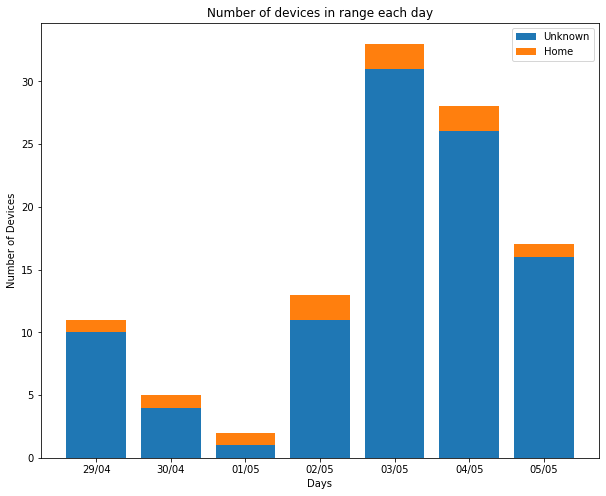

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

p1 = plt.bar(devices.date, devices.unknown)
p2 = plt.bar(devices.date, devices.home, bottom=devices.unknown)
plt.legend(['Unknown', 'Home'])

plt.xlabel("Days")
plt.ylabel("Number of Devices")
plt.title("Number of devices in range each day")
plt.show()

In [8]:
import os

for date, table in dataframes.items():
    path = 'C:\\Users\\dev\\Desktop\\dcn\\bluetooth_files'
    file_name = date[:2] + '_' + date[2:] + '.csv'
    file_path = os.path.join(path, file_name)
    table.to_csv(file_path)